In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
filepath = "./GEO Samples/none_cancer_merged_data_with_metadata.csv"
none_cancer = pd.read_csv(filepath)

filepath = "./GEO Samples/Ov_merged_data_with_metadata.csv"
ov_samples = pd.read_csv(filepath)


In [3]:
# Drop ID and lable column
ov = ov_samples.drop(['ID', 'Stage'], axis=1, inplace=False)
ov_lable = pd.DataFrame({'Stage': [1] * 700})

In [4]:
# Select random Non-Cancer Samples
# The amount would be:
# 1- exact number of OV samples
# 2- double number of OV samples, then make the ov samples duplicated

# number of non cancer samples to select

# direction1 :
n = ov.shape[0]
nc_samples = none_cancer.sample(n= n , random_state=19)

# Drop ID and lable column
nc = nc_samples.drop(['ID', 'Stage'], axis=1, inplace=False)
nc_lable = nc_samples[['Stage']]

# Append nc to ov samples
x = pd.concat([ov, nc], ignore_index=True)
y = pd.concat([ov_lable, nc_lable], ignore_index=True)

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)


In [6]:

# # Normalization with Z-Score
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_oversampled)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled

In [7]:
# Normalization with Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
normalized_train_samples = pd.DataFrame(X_train_scaled, columns= x.columns)
normalized_test_samples = pd.DataFrame(X_test_scaled, columns= x.columns)
normalized_train_samples

,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,0.512821,0.765511,0.585787,0.430125,0.283099,0.551638,0.198377,0.533718,0.301393,0.022039,...,0.626402,0.246258,0.194391,0.595767,0.542869,0.251898,0.613866,0.462404,0.321100,0.701642
1,0.397436,0.228923,0.121690,0.132170,0.011449,0.145614,0.005036,0.187821,0.108756,0.010081,...,0.220558,0.017783,0.002647,0.247050,0.107954,0.009343,0.183073,0.057519,0.036380,0.168398
2,0.192308,0.236310,0.125677,0.127956,0.025469,0.170047,0.004378,0.198680,0.111472,0.004659,...,0.239071,0.023369,0.004433,0.226670,0.120238,0.011648,0.182065,0.065507,0.042882,0.176508
3,0.692308,0.267027,0.213856,0.165290,0.053876,0.188555,0.026336,0.241899,0.133151,0.009330,...,0.259117,0.050080,0.012453,0.251779,0.130513,0.042718,0.217027,0.123739,0.058281,0.240998
4,0.512821,0.694746,0.401499,0.378131,0.176174,0.459891,0.113956,0.554474,0.341455,0.117286,...,0.436580,0.204155,0.062522,0.481165,0.358069,0.162594,0.487169,0.384283,0.161092,0.532013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.628205,0.230472,0.147893,0.117950,0.012539,0.132864,0.003269,0.158118,0.088322,0.004737,...,0.220244,0.012342,0.004390,0.235878,0.097110,0.004980,0.176733,0.047640,0.031263,0.182730
1116,0.512821,0.334052,0.243353,0.194311,0.123441,0.245468,0.072050,0.271287,0.166350,0.011802,...,0.322327,0.136117,0.073766,0.350364,0.238084,0.109153,0.271397,0.248660,0.117352,0.263957
1117,0.512821,0.124716,0.145500,0.083058,0.054453,0.082808,0.005261,0.137223,0.087574,0.002715,...,0.187923,0.041949,0.040586,0.226053,0.120429,0.025277,0.158945,0.064568,0.051363,0.128846
1118,0.423077,0.228580,0.158379,0.143405,0.020342,0.176223,0.007290,0.179337,0.112144,0.005805,...,0.206821,0.025777,0.003690,0.229764,0.125925,0.011547,0.175241,0.060995,0.041067,0.195010


In [9]:
# Concate normalized data and lables:

y_train = y_train.reset_index(drop=True)
X_train = normalized_train_samples.reset_index(drop=True)

train_normalized = pd.concat([y_train, X_train], axis=1)

filepath = "./GEO Samples/train_data_binary_classification.csv"
train_normalized.to_csv(filepath, index=False)

train_normalized

,Stage,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,0,0.512821,0.765511,0.585787,0.430125,0.283099,0.551638,0.198377,0.533718,0.301393,...,0.626402,0.246258,0.194391,0.595767,0.542869,0.251898,0.613866,0.462404,0.321100,0.701642
1,1,0.397436,0.228923,0.121690,0.132170,0.011449,0.145614,0.005036,0.187821,0.108756,...,0.220558,0.017783,0.002647,0.247050,0.107954,0.009343,0.183073,0.057519,0.036380,0.168398
2,1,0.192308,0.236310,0.125677,0.127956,0.025469,0.170047,0.004378,0.198680,0.111472,...,0.239071,0.023369,0.004433,0.226670,0.120238,0.011648,0.182065,0.065507,0.042882,0.176508
3,1,0.692308,0.267027,0.213856,0.165290,0.053876,0.188555,0.026336,0.241899,0.133151,...,0.259117,0.050080,0.012453,0.251779,0.130513,0.042718,0.217027,0.123739,0.058281,0.240998
4,0,0.512821,0.694746,0.401499,0.378131,0.176174,0.459891,0.113956,0.554474,0.341455,...,0.436580,0.204155,0.062522,0.481165,0.358069,0.162594,0.487169,0.384283,0.161092,0.532013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1,0.628205,0.230472,0.147893,0.117950,0.012539,0.132864,0.003269,0.158118,0.088322,...,0.220244,0.012342,0.004390,0.235878,0.097110,0.004980,0.176733,0.047640,0.031263,0.182730
1116,0,0.512821,0.334052,0.243353,0.194311,0.123441,0.245468,0.072050,0.271287,0.166350,...,0.322327,0.136117,0.073766,0.350364,0.238084,0.109153,0.271397,0.248660,0.117352,0.263957
1117,0,0.512821,0.124716,0.145500,0.083058,0.054453,0.082808,0.005261,0.137223,0.087574,...,0.187923,0.041949,0.040586,0.226053,0.120429,0.025277,0.158945,0.064568,0.051363,0.128846
1118,1,0.423077,0.228580,0.158379,0.143405,0.020342,0.176223,0.007290,0.179337,0.112144,...,0.206821,0.025777,0.003690,0.229764,0.125925,0.011547,0.175241,0.060995,0.041067,0.195010


In [10]:
# Concate normalized Test data and lables 

y_test = y_test.reset_index(drop=True)
X_test = normalized_test_samples.reset_index(drop=True)

test_data = pd.concat([y_test, X_test ], axis=1)

filepath = "./GEO Samples/test_data_binary_classification.csv.csv"
test_data.to_csv(filepath, index=False)

test_data

,Stage,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,0,0.512821,0.452918,0.331098,0.297320,0.217499,0.318067,0.097376,0.364864,0.214048,...,0.378288,0.162550,0.082623,0.377865,0.307894,0.150802,0.363726,0.326270,0.172604,0.343207
1,1,0.500000,0.318752,0.229306,0.174825,0.052307,0.185091,0.025716,0.231109,0.133285,...,0.244797,0.033032,0.007029,0.261540,0.150404,0.032384,0.208493,0.097793,0.051861,0.172841
2,0,0.410256,0.558713,0.464151,0.307921,0.314072,0.401619,0.190325,0.420985,0.247101,...,0.497971,0.230075,0.161767,0.586972,0.495755,0.235367,0.492257,0.472867,0.232861,0.431428
3,0,0.512821,0.469606,0.325236,0.285247,0.128083,0.337684,0.079154,0.349199,0.229106,...,0.441905,0.104597,0.039482,0.396417,0.302200,0.117186,0.381342,0.237984,0.179435,0.407700
4,0,0.512821,0.402565,0.237595,0.252115,0.090422,0.281923,0.059528,0.323954,0.178638,...,0.400150,0.097443,0.034696,0.388790,0.246210,0.080672,0.328983,0.240256,0.121874,0.321300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,0.358974,0.337176,0.235398,0.192374,0.178528,0.240931,0.065445,0.281082,0.194626,...,0.342887,0.127761,0.073995,0.361067,0.216362,0.109247,0.338659,0.235150,0.126317,0.267900
276,0,0.512821,0.322989,0.297017,0.238442,0.268159,0.218682,0.101149,0.283196,0.177832,...,0.306507,0.237351,0.128034,0.353383,0.314534,0.152100,0.317681,0.250258,0.166237,0.344523
277,1,0.461538,0.319147,0.203717,0.164258,0.107037,0.211088,0.029193,0.217429,0.139670,...,0.323600,0.092134,0.025680,0.282155,0.187939,0.079254,0.253370,0.188344,0.101343,0.245530
278,1,0.602564,0.459214,0.252723,0.187731,0.068393,0.258713,0.038330,0.323452,0.157578,...,0.360660,0.071134,0.013412,0.344718,0.224025,0.065972,0.274945,0.179723,0.098647,0.331109


In [11]:
# Train Random Forest on full data and get feature importances
from sklearn.ensemble import RandomForestClassifier
import numpy as np

x = X_train
y = y_train

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(x, y["Stage"])

# Get feature importances and select top k
RF_importances = model.feature_importances_
indices = np.argsort(RF_importances)[::-1]  # Sort descending

top_k = 100
top_indices = indices[:top_k]
rf_x_selected = x.iloc[:, top_indices]
rf_x_selected

,MIMAT0027496,MIMAT0015069,MIMAT0015064,MIMAT0019015,MIMAT0003240,MIMAT0004951,MIMAT0016904,MIMAT0005922,MIMAT0018205,MIMAT0005866,...,MIMAT0017990,MIMAT0006767,MIMAT0018354,MIMAT0018968,MIMAT0018971,MIMAT0003270,MIMAT0015037,MIMAT0004764,MIMAT0019956,MIMAT0004592
0,0.105068,0.190965,0.110784,0.120149,0.059107,0.093636,0.169194,0.098507,0.194433,0.156013,...,0.485852,0.298531,0.525452,0.160199,0.046928,0.312807,0.580230,0.468022,0.159987,0.025247
1,0.001211,0.010939,0.001728,0.006279,0.001567,0.000209,0.016182,0.001304,0.020864,0.007284,...,0.229280,0.088389,0.269210,0.001227,0.008627,0.012381,0.201670,0.205157,0.001940,0.007146
2,0.002042,0.027984,0.002852,0.007836,0.002058,0.003107,0.021512,0.003126,0.020852,0.007292,...,0.221457,0.088470,0.261840,0.020643,0.008566,0.033748,0.173522,0.223141,0.014388,0.005762
3,0.003094,0.032947,0.003801,0.009417,0.004647,0.006764,0.024364,0.002927,0.023342,0.014488,...,0.297490,0.088551,0.324113,0.007770,0.014514,0.046941,0.216164,0.239374,0.004626,0.007028
4,0.057468,0.143712,0.065289,0.034040,0.039097,0.075240,0.231651,0.052007,0.104526,0.126866,...,0.486431,0.221082,0.581863,0.085419,0.037803,0.261201,0.405647,0.532493,0.138330,0.020938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.000961,0.019808,0.001639,0.003967,0.001648,0.000766,0.015938,0.001020,0.013848,0.007485,...,0.231365,0.084787,0.233089,0.003741,0.008004,0.021371,0.180471,0.202132,0.003835,0.005871
1116,0.059878,0.113942,0.068663,0.032370,0.022171,0.059767,0.090728,0.048430,0.095445,0.115869,...,0.375234,0.127983,0.359845,0.100923,0.024516,0.197134,0.299736,0.291118,0.121853,0.012464
1117,0.039082,0.044506,0.032960,0.031633,0.020012,0.029454,0.039479,0.039220,0.047554,0.038136,...,0.180837,0.053501,0.206098,0.027815,0.023637,0.060723,0.125398,0.158292,0.066300,0.003788
1118,0.001396,0.022707,0.002895,0.007304,0.002824,0.002026,0.017078,0.002101,0.020260,0.006099,...,0.230439,0.081380,0.260191,0.004564,0.008494,0.005557,0.168823,0.194665,0.004909,0.005967


In [12]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

k = 100
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
x_mi_selected = mi_selector.fit_transform(x, y["Stage"])

# Get the actual indices of selected features
mi_indices = mi_selector.get_support(indices=True)
mi_indices

array([  28,   52,   68,  154,  218,  234,  251,  252,  296,  302,  365,
        384,  417,  432,  437,  460,  472,  542,  546,  569,  570,  597,
        621,  634,  687,  702,  712,  713,  751,  767,  828,  834,  853,
        865,  866,  876,  914,  934,  945,  970, 1005, 1022, 1039, 1107,
       1168, 1181, 1183, 1193, 1213, 1246, 1270, 1290, 1299, 1319, 1351,
       1448, 1454, 1459, 1460, 1488, 1502, 1509, 1550, 1576, 1606, 1713,
       1747, 1749, 1774, 1802, 1803, 1806, 1815, 1879, 1907, 1951, 1961,
       1962, 1972, 1978, 2025, 2047, 2054, 2084, 2085, 2101, 2109, 2113,
       2124, 2137, 2183, 2197, 2213, 2223, 2231, 2274, 2286, 2358, 2372,
       2542], dtype=int64)

In [13]:
# Get top k feature indices by model importance
top_k_model_indices = np.argsort(RF_importances)[::-1][:k]

# Compare overlap
overlap = set(mi_indices) & set(top_k_model_indices)
print(f"Overlap count: {len(overlap)} out of {k}")
print(f"Overlap indices: {sorted(overlap)}")


Overlap count: 58 out of 100
Overlap indices: [28, 68, 154, 218, 234, 251, 252, 384, 417, 432, 460, 542, 570, 597, 687, 702, 713, 767, 828, 834, 853, 876, 914, 945, 970, 1005, 1039, 1107, 1168, 1181, 1213, 1246, 1270, 1290, 1319, 1460, 1509, 1550, 1606, 1774, 1802, 1806, 1815, 1961, 1962, 2054, 2084, 2085, 2101, 2109, 2113, 2137, 2197, 2213, 2231, 2274, 2358, 2542]


In [14]:
X_train = x.iloc[:, sorted(overlap)]
X_train

,MIMAT0005905,MIMAT0027511,MIMAT0027592,MIMAT0022260,MIMAT0030996,MIMAT0004602,MIMAT0003228,MIMAT0027520,MIMAT0007881,MIMAT0015058,...,MIMAT0005586,MIMAT0016904,MIMAT0015069,MIMAT0027462,MIMAT0018925,MIMAT0027430,MIMAT0003308,MIMAT0019077,MIMAT0019069,MIMAT0027678
0,0.144644,0.356243,0.183187,0.171205,0.147482,0.013691,0.060957,0.178935,0.088342,0.139960,...,0.075829,0.169194,0.190965,0.128310,0.091354,0.178317,0.137928,0.062000,0.142680,0.194391
1,0.006301,0.016381,0.019382,0.009808,0.000538,0.000507,0.007637,0.039455,0.001610,0.004559,...,0.001215,0.016182,0.010939,0.000298,0.000424,0.000721,0.001025,0.008876,0.000889,0.002647
2,0.006357,0.021328,0.021746,0.008913,0.009372,0.000342,0.010787,0.042359,0.004033,0.011315,...,0.006623,0.021512,0.027984,0.002862,0.002885,0.006428,0.010304,0.008886,0.002373,0.004433
3,0.024892,0.022782,0.024648,0.013686,0.003927,0.001346,0.015330,0.052923,0.003963,0.012006,...,0.005278,0.024364,0.032947,0.003530,0.004032,0.005885,0.002472,0.009176,0.004363,0.012453
4,0.065432,0.248475,0.113037,0.082360,0.084615,0.009807,0.073767,0.161291,0.065338,0.100207,...,0.075781,0.231651,0.143712,0.095825,0.073821,0.125343,0.130004,0.057580,0.034871,0.062522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.001310,0.010923,0.018581,0.006679,0.001808,0.000418,0.008335,0.036102,0.001847,0.004776,...,0.000588,0.015938,0.019808,0.000000,0.000434,0.001784,0.001583,0.006735,0.001350,0.004390
1116,0.053176,0.193479,0.064872,0.101208,0.073788,0.004141,0.029879,0.105475,0.052192,0.077395,...,0.042384,0.090728,0.113942,0.063025,0.041593,0.087867,0.072553,0.030630,0.058691,0.073766
1117,0.015917,0.136393,0.043414,0.057738,0.066288,0.002550,0.022139,0.065069,0.039442,0.048485,...,0.027006,0.039479,0.044506,0.048741,0.043422,0.068117,0.051323,0.019687,0.024046,0.040586
1118,0.006498,0.019245,0.025503,0.008925,0.002802,0.000761,0.009091,0.040936,0.003332,0.006372,...,0.004242,0.017078,0.022707,0.000749,0.002231,0.005237,0.002823,0.006241,0.002319,0.003690


In [15]:
X_test = normalized_test_samples.iloc[:, sorted(overlap)]
X_test

,MIMAT0005905,MIMAT0027511,MIMAT0027592,MIMAT0022260,MIMAT0030996,MIMAT0004602,MIMAT0003228,MIMAT0027520,MIMAT0007881,MIMAT0015058,...,MIMAT0005586,MIMAT0016904,MIMAT0015069,MIMAT0027462,MIMAT0018925,MIMAT0027430,MIMAT0003308,MIMAT0019077,MIMAT0019069,MIMAT0027678
0,0.064239,0.239812,0.093956,0.090570,0.153132,0.019919,0.053299,0.153609,0.091379,0.113966,...,0.120294,0.174137,0.168277,0.110017,0.077978,0.123325,0.133209,0.050376,0.052993,0.082623
1,0.017579,0.026538,0.022767,0.013151,0.002788,0.000768,0.013341,0.044307,0.005295,0.009812,...,0.005742,0.020556,0.022952,0.002999,0.003418,0.006235,0.003900,0.009637,0.004022,0.007029
2,0.106461,0.272559,0.127414,0.194790,0.225706,0.012275,0.067428,0.206730,0.209065,0.196410,...,0.133675,0.234070,0.294573,0.177018,0.154707,0.206758,0.244071,0.056671,0.224592,0.161767
3,0.056336,0.057521,0.083153,0.043631,0.025162,0.004497,0.035169,0.132694,0.019077,0.034085,...,0.024389,0.080237,0.085552,0.018417,0.021610,0.031641,0.024488,0.034901,0.014257,0.039482
4,0.041840,0.066493,0.045091,0.047311,0.029754,0.005248,0.036057,0.105791,0.022096,0.037286,...,0.023508,0.066583,0.073742,0.025517,0.017252,0.029019,0.026902,0.029174,0.028761,0.034696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0.045385,0.138703,0.080176,0.074105,0.117969,0.015312,0.044239,0.117338,0.076519,0.094597,...,0.085085,0.127878,0.127163,0.107564,0.081086,0.105850,0.109833,0.051010,0.049062,0.073995
276,0.116741,0.349957,0.152867,0.125100,0.194669,0.031678,0.074911,0.154876,0.124278,0.196408,...,0.136712,0.199260,0.197073,0.142397,0.114080,0.191435,0.181559,0.079417,0.118074,0.128034
277,0.020763,0.080519,0.043580,0.027120,0.015616,0.002070,0.020457,0.063420,0.010914,0.030901,...,0.015575,0.055518,0.057956,0.019900,0.015042,0.023737,0.022376,0.020530,0.010254,0.025680
278,0.025199,0.042651,0.031068,0.023957,0.008830,0.001931,0.029068,0.084287,0.007623,0.017368,...,0.025856,0.051507,0.045693,0.004907,0.005862,0.009976,0.008876,0.014865,0.003325,0.013412


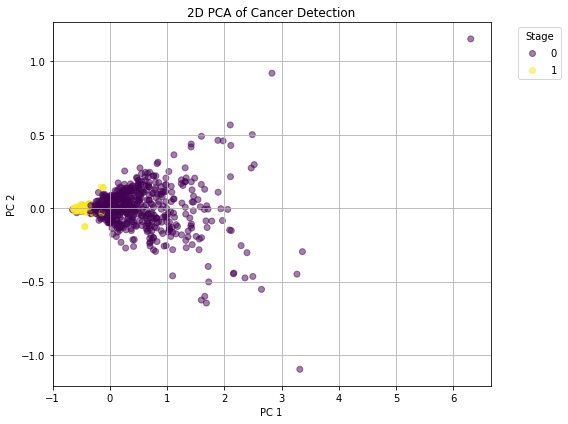

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)

df_pca = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
df_pca["Stage"] = y["Stage"].values


# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=y["Stage"],
    cmap='viridis',        # Try 'Set1', 'tab20', or 'nipy_spectral' for more color variety
    alpha=0.5           # Higher opacity
)
plt.legend(*scatter.legend_elements(), title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D PCA of Cancer Detection")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

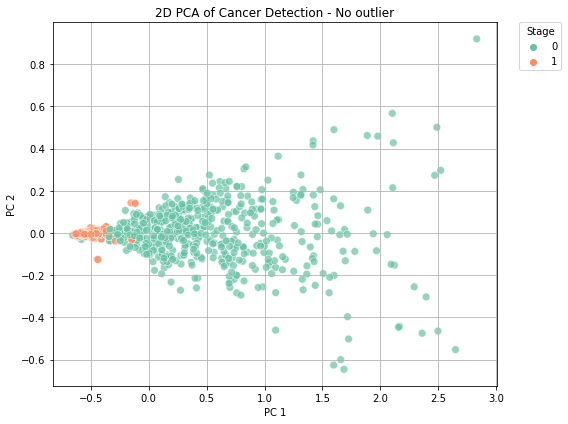

In [25]:
# Drop the Outliers!

df = df_pca
s0 = df_pca[df_pca["PC1"] > 3]
df = df.drop( s0.index.tolist())


# Step 4: Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Stage",
    palette="Set2",
    alpha=0.7,
    s=60
)
plt.title("2D PCA of Cancer Detection - No outlier")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.legend(title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Create and train the model
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train["Stage"])

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("LogisticRegression\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


LogisticRegression
--------------------------
Accuracy: 0.9642857142857143
Confusion Matrix:
 [[131   9]
 [  1 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       140
           1       0.94      0.99      0.97       140

    accuracy                           0.96       280
   macro avg       0.97      0.96      0.96       280
weighted avg       0.97      0.96      0.96       280



In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the XGBoost model
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
print("XGBClassifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBClassifier
--------------------------
Accuracy: 0.9928571428571429
Confusion Matrix:
 [[138   2]
 [  0 140]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       140
           1       0.99      1.00      0.99       140

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280

